In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import joblib
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')

In [23]:
lr = joblib.load('xgb_unbalanced_tinderlikes.joblib')
probas_xgb_unbalanced = pd.Series(lr.predict_proba(encodings)[:,1])
sorted_probas_xgb_unbalanced = sorted(probas_xgb_unbalanced, reverse=True)


In [24]:
lr = joblib.load('rf_tinderlikes3.joblib')
probas_rf = pd.Series(lr.predict_proba(encodings)[:,1])
sorted_probas_rf = sorted(probas_rf, reverse=True)

In [12]:
# lr = joblib.load('knn_tinderlikes3.joblib')
# probas_knn = pd.Series(lr.predict_proba(encodings)[:,1])
# sorted_probas_knn = sorted(probas_knn, reverse=True)

In [25]:
lr = joblib.load('lr_tinderlikes3.joblib')
probas_lr = pd.Series(lr.predict_proba(encodings)[:,1])
sorted_probas_lr = sorted(probas_lr, reverse=True)

In [26]:
dic_rf = {key:[i] for i,key in enumerate(np.argsort(probas_rf))}
dic_xgb = {key:[i] for i,key in enumerate(np.argsort(probas_xgb_unbalanced))}
# dic_knn = {key:[i] for i,key in enumerate(np.argsort(probas_knn))}
dic_lr = {key:[i] for i,key in enumerate(np.argsort(probas_lr))}


d_ = {
'x_rf':[dic_rf[key][0] for key in range(len(probas_xgb))],
'x_xgb':[dic_xgb[key][0] for key in range(len(probas_xgb))],
# 'x_knn':[dic_knn[key][0] for key in range(len(probas_xgb))],
'x_lr':[dic_lr[key][0] for key in range(len(probas_xgb))]
}

df = pd.DataFrame(d_)
df

,x_lr,x_rf,x_xgb
0,11,3,6
1,20,8,12
2,19,32,17
3,35,12,37
4,27,31,35
5,44,37,31
6,41,48,47
7,42,45,27
8,14,14,14
9,34,35,30


In [27]:
def find_closest_line(num_of_examples, df):
    calc_euclidean_dist = lambda x,y: ((x[0]-y[0])**2 + (x[1]-y[1])**2)**0.5

    def find_the_closest_pt(pt, line):
        dists = [calc_euclidean_dist(line_pt, pt) for line_pt in line] 
        return line[np.argmin(dists)]

    def find_the_closest_distance(pt, line):
        dists = [calc_euclidean_dist(line_pt, pt) for line_pt in line] 
        return np.min(dists)

    ideal_line = np.array([(x, x) for x in range(num_of_examples)])
    closest_pts_on_line = np.array([find_the_closest_pt(df.iloc[i], ideal_line) for i, pt in enumerate(ideal_line)])
    closest_errors = np.array([find_the_closest_distance(df.iloc[i], ideal_line) for i, pt in enumerate(ideal_line)])

    return ideal_line, closest_pts_on_line, closest_errors


ideal_line, closest_pts_on_line, closest_errors = find_closest_line(len(probas_knn), df)

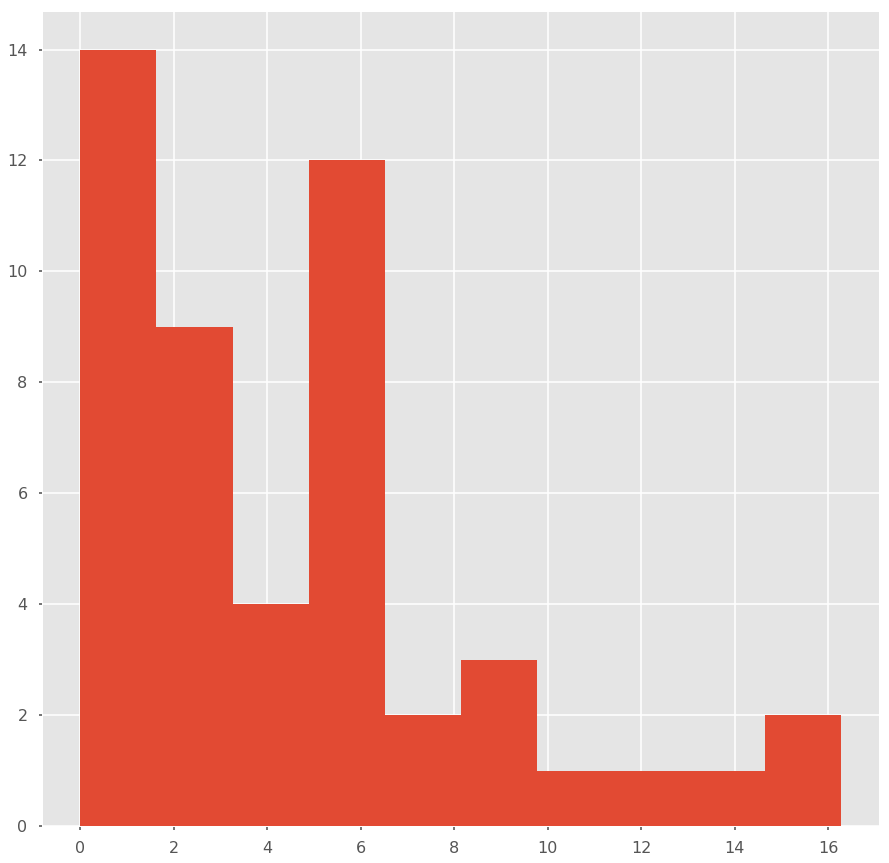

In [28]:
pd.Series(closest_errors).hist()

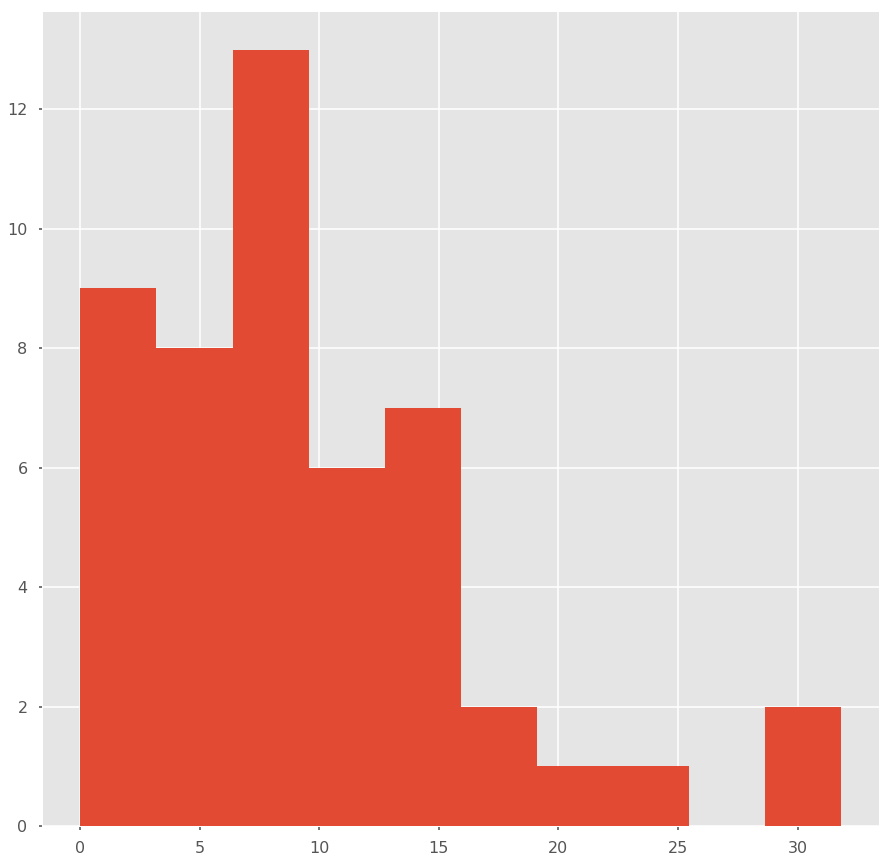

In [20]:
pd.Series(closest_errors).hist()

# No Knn

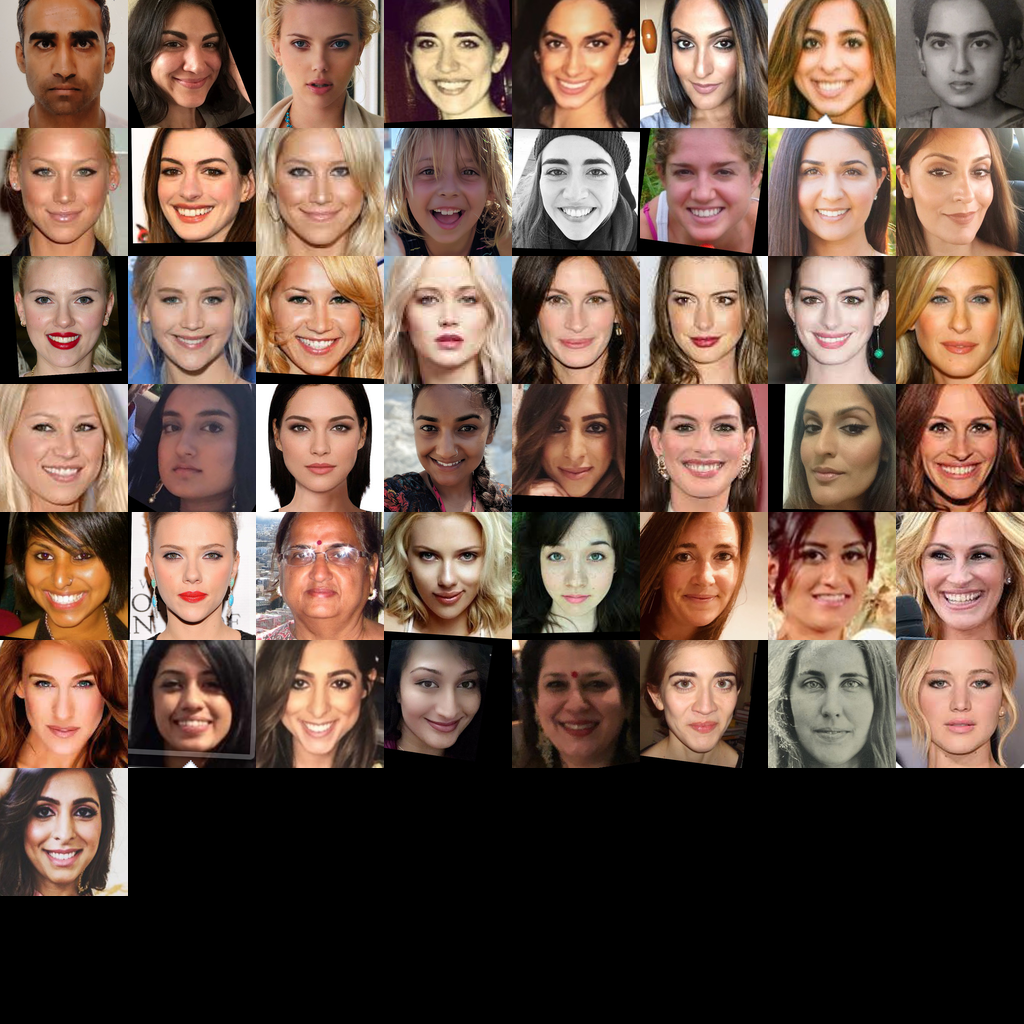

In [29]:
display(
    montagify([np.array(arrays_rescaled[arg]) for arg in np.argsort(closest_errors)[::-1]],
    (128,128), 
    tiles=(8,8)
))


# With Knn

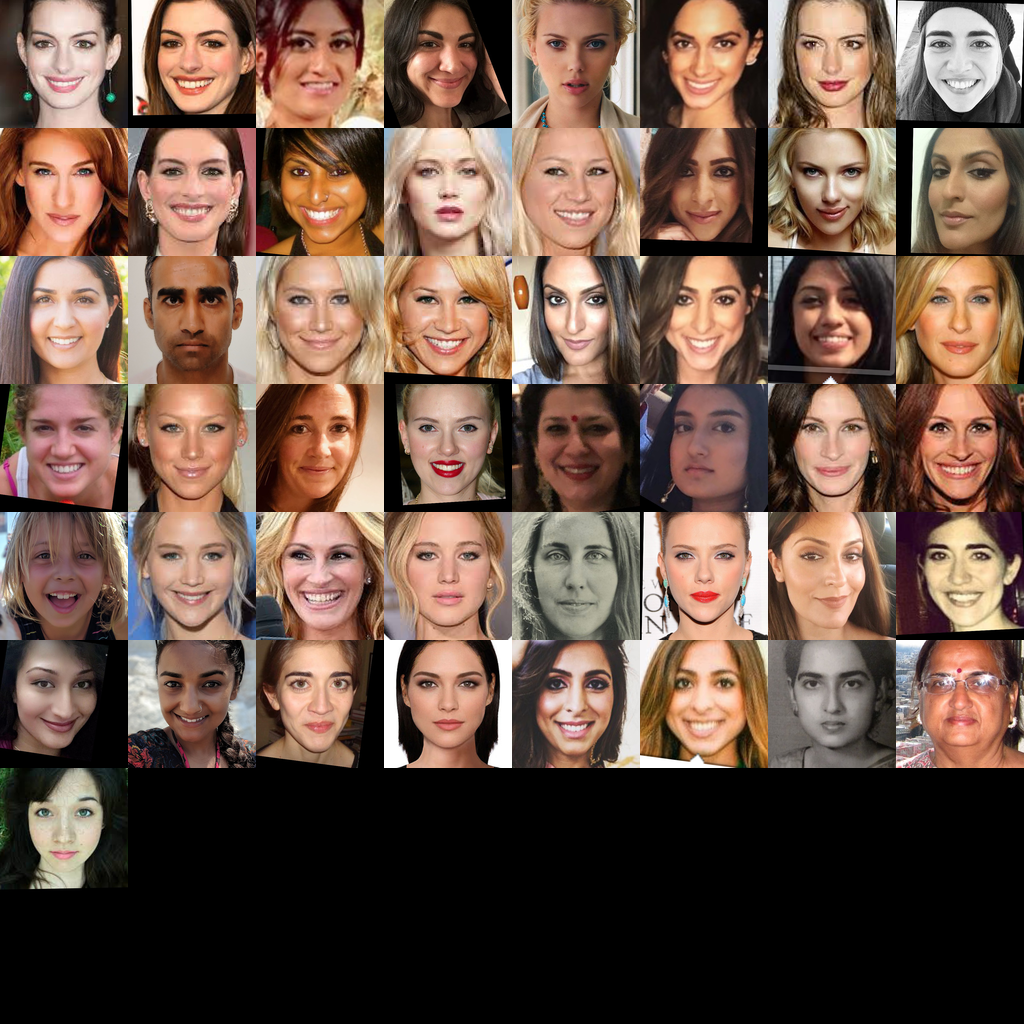

In [19]:
display(
    montagify([np.array(arrays_rescaled[arg]) for arg in np.argsort(closest_errors)[::-1]],
    (128,128), 
    tiles=(8,8)
))
